 Collin Lindsay
## MSBD566
 September 18, 2025

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air. The AQI is reported according to the Environmental Protection Agency's scale. The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are based on a variety of environmental and seasonal factors, including past and current pollen counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen forecast is currently reported on a scale of 0 to 12 as follows:

Pollen Count Pollen Level

0.0 to 2.4 Low

2.5 to 4.8 Low – Medium

4.9 to 7.2 Medium

7.3 to 9.6 Medium – High

9.7 to 12.0 High

Question 1: Explore the data by plotting AQI and Category across the years in two separate plots. Make sure they have proper labels and titles. Use a datetime format for the dates.

a. How many times has the AQI been recorded above 120?

b. When did the Air Quality Index Category become unhealthy?

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [175]:
file_path = pd.read_csv("/Users/collinlindsay/Downloads/Air_Quality_and_Pollen_Count.csv")
df = file_path
df

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00
...,...,...,...,...,...,...,...,...
8915,8916,28.0,Good,PM10,NaN,NaN,NaN,2001/01/08 06:00:00+00
8916,8917,26.0,Good,PM10,NaN,NaN,NaN,2001/01/05 06:00:00+00
8917,8918,25.0,Good,Carbon monoxide,NaN,NaN,NaN,2001/01/04 06:00:00+00
8918,8919,33.0,Good,PM10,NaN,NaN,NaN,2001/01/03 06:00:00+00


In [176]:
AQI = df['AQI']
df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'])
DATE_TIME = df['ReportDateTime']
Category = df['Category']


Text(0.5, 1.0, ' AQI from 2001 to 2024')

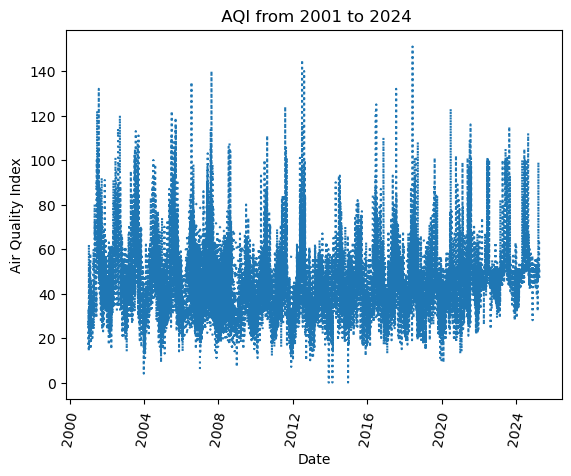

In [177]:
# Plotting AQI vs DateTime
plt.plot(DATE_TIME, AQI, linestyle='dotted')
#plt.xticks(pd.date_range(start=2001, end=2024, freq='1YE'))
plt.xticks(rotation=80)
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.title(' AQI from 2001 to 2024')


Text(0.5, 1.0, ' AQI from 2001 to 2024')

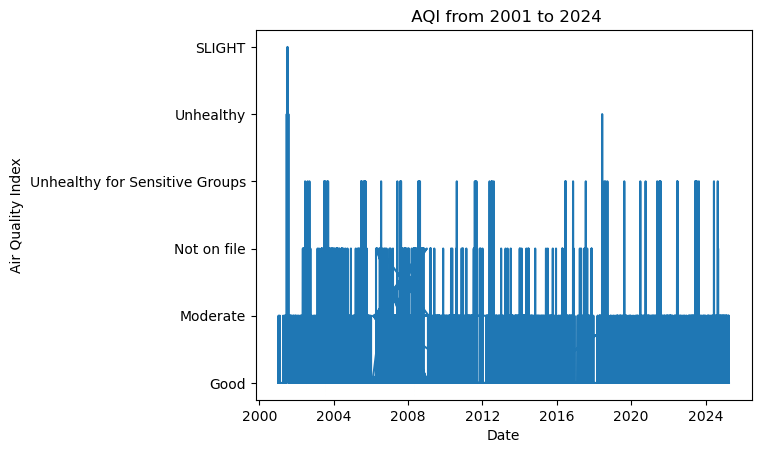

In [178]:
# Plotting Category vs DateTime
plt.plot(DATE_TIME, Category, linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.title(' AQI from 2001 to 2024')

### a. How many times has the AQI been recorded above 120?

In [179]:
# Number of AQI instances above 120

AQI_above_120 = (AQI > 120).sum()
print(f"Number of times AQI above 120: {AQI_above_120}")

Number of times AQI above 120: 14


### b. When did the Air Quality Index Category become unhealthy?

In [180]:
# Counting the amount of Unhealthy Instances in AQI
Category_Counts = Category.value_counts()
print(Category_Counts)
print(f"The amount of Unhealthy Instances in AQI is: {Category_Counts['Unhealthy']}")

Category
Good                              5991
Moderate                          2620
Not on file                        228
Unhealthy for Sensitive Groups      76
Unhealthy                            4
SLIGHT                               1
Name: count, dtype: int64
The amount of Unhealthy Instances in AQI is: 4


In [181]:
# DF rows where pollen AQI reached Unhealthy

specific_Unhealthy_value = 'Unhealthy'
filtered_df = df[df['Category'] == specific_Unhealthy_value]
print(filtered_df)

      OBJECTID    AQI   Category ResponsiblePollutant  PollenCount PollenType  \
2507      2508  151.0  Unhealthy           Ozone 8-hr          5.0      Grass   
8778      8779  132.0  Unhealthy           Ozone 8-hr          5.0      Grass   
8786      8787  105.0  Unhealthy                PM2.5          8.0      Grass   
8800      8801  122.0  Unhealthy           Ozone 8-hr          3.0      Grass   

     PollenDescription            ReportDateTime  
2507           Juniper 2018-06-09 05:00:00+00:00  
8778            Slight 2001-07-24 05:00:00+00:00  
8786          Moderate 2001-07-12 05:00:00+00:00  
8800            Slight 2001-06-21 05:00:00+00:00  


### Question 2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

In [182]:
# Grass is the most common Pollen Type

pollen_type_counts = df['PollenType'].value_counts()
pollen_type_counts

PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64

### Question 3: [Open-ended] Based on this data, do you think Nashville is a city that is comfortable to live (based on the air quality and pollen only)? Why?

Nashville is definitely a city that is comfortable to live in pending you do not have a serious allergy to Grass. Nashville Air Quality Index data shows that the city is fairly stable pollen wise during the Fall and Winter months and becomes for Pollen dense in the Spring and Summer. Based on there only being 4 instances where the AQI is considered unhealthy over a 20+ year period, this proves that overall Air Quality is good in Nashville. 

### Question 4: [A vectorization problem]. Compare the manual approach versus a vectorized approach to find the mean AQI for each Air Quality Category ('Category' in the table). For the vectorized method, you can use groupby() and mean() method in pandas datatype (ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a regular for-loop can be used. Calculate the time difference between the two approaches and evaluate.

In [183]:
# Vectoring method
import time
time_start = time.time() 
aqi_mean = df.groupby('Category')['AQI'].mean()
print(aqi_mean)
time_end = time.time()
vector_time_taken = time_end - time_start
print(f'Time taken: {vector_time_taken} seconds')

Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Time taken: 0.0027871131896972656 seconds


In [184]:
# Manual Method

time_start = time.time() 

aqi_mean_manual = {}
for category in df['Category'].unique():
    aqi_mean_manual[category] = df[df['Category'] == category]['AQI'].mean()
print(aqi_mean_manual)
time_end = time.time()
manual_time_taken = time_end - time_start
print(f'Time taken: {manual_time_taken} seconds')

{'Good': 36.966282757469536, 'Moderate': 62.240839694656486, 'Not on file': nan, 'Unhealthy for Sensitive Groups': 110.07894736842105, 'Unhealthy': 127.5, 'SLIGHT': 60.0}
Time taken: 0.008325815200805664 seconds


In [185]:
vector = vector_time_taken
manual = manual_time_taken

manual - vector

0.0055387020111083984